In [49]:
import numpy as np
import pandas as pd
import os
from google.colab import files

import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow_datasets as tfds

In [50]:
from tensorflow import keras

In [51]:
import torchvision

In [52]:
# from zipfile import ZipFile
# file_name = '/content/BrainTumorData.zip'

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')

In [53]:
# load the training and test sets and create all 4 classes
print(os.getcwd())
# get stuff in BrainTumorData
# which has Testing and Training
labels = []

/content


In [54]:
# data_directory = str(os.getcwd()) + '\BrainTumorData'
data_directory = str(os.getcwd()) + '/BrainTumorData'


# display contents of data directory
print(os.listdir(data_directory))

class_labels = []

for item in os.listdir(data_directory):
    print(item)
    # class_labels = os.listdir(data_directory + '\\' + item)
    class_labels = os.listdir(data_directory + '/' + item)


print(class_labels)

# before taking out validation set
#X_train_full
#y_train_full

['Training', 'Testing']
Training
Testing
['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']


In [55]:
print(data_directory)

/content/BrainTumorData


In [56]:
curr_dir = data_directory + '\Testing\\'

In [57]:
# we want to do this after pullig out validation
X_train = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="training",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        batch_size=32,
                                                        image_size=(250, 250), shuffle=True)

X_valid = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="validation",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        batch_size=32,
                                                        image_size=(250, 250), shuffle=True)



Found 2870 files belonging to 4 classes.
Using 2526 files for training.
Found 2870 files belonging to 4 classes.
Using 344 files for validation.


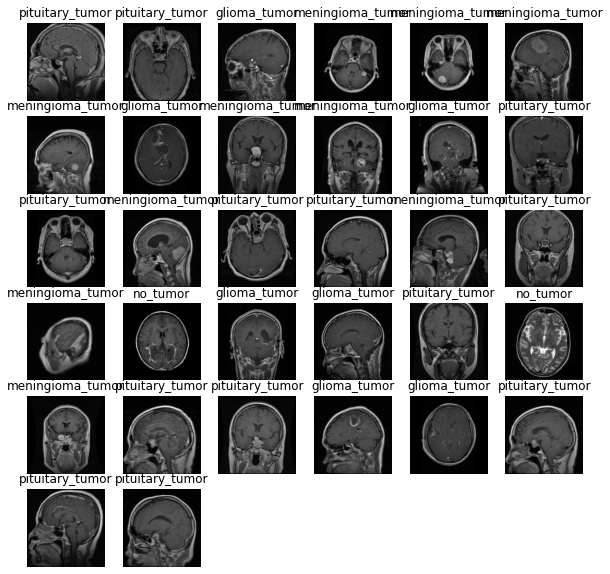

In [58]:
# visualize train images

plt.figure(figsize=(10,10))
for images, labels in X_train.take(1):
    #print(labels)
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        #print(list(np.asarray(labels[i])))
        label_index = list(np.asarray(labels[i])).index(1)
        #label_index = np.asarray(labels[i]).where(1)
        label = class_labels[label_index]
        plt.title(label)
        plt.axis('off')

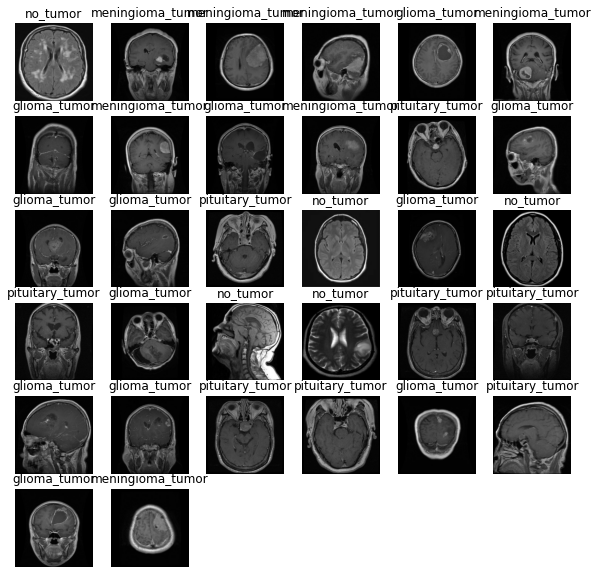

In [59]:
#visualize validation images
plt.figure(figsize=(10,10))
for images, labels in X_valid.take(1):
    #print(labels)
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        #print(list(np.asarray(labels[i])))
        label_index = list(np.asarray(labels[i])).index(1)
        #label_index = np.asarray(labels[i]).where(1)
        label = class_labels[label_index]
        plt.title(label)
        plt.axis('off')

In [60]:
curr_dir = data_directory + '/Testing/'
#data_dict = {label:[os.listdir(curr_dir + label)] for label in class_labels}
dict = {}
for label in class_labels:
    dict = {label:file for file in os.listdir(curr_dir + label)}
    #for file in os.listdir(curr_dir + label):
        #print(file)
    print(dict)
#df = pd.DataFrame(data_dict)
#df

{'pituitary_tumor': 'image(88).jpg'}
{'meningioma_tumor': 'image(88).jpg'}
{'no_tumor': 'image(88).jpg'}
{'glioma_tumor': 'image(88).jpg'}


In [61]:
#  google colab use gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


Epoch 1/50
79/79 [==============================] - 32s 253ms/step - loss: 0.7428 - accuracy: 0.7150 - val_loss: 0.5553 - val_accuracy: 0.7616
Epoch 2/50
79/79 [==============================] - 17s 214ms/step - loss: 0.4549 - accuracy: 0.8250 - val_loss: 0.4245 - val_accuracy: 0.8430
Epoch 3/50
79/79 [==============================] - 17s 211ms/step - loss: 0.4227 - accuracy: 0.8448 - val_loss: 0.3813 - val_accuracy: 0.8517
Epoch 4/50
79/79 [==============================] - 17s 212ms/step - loss: 0.3604 - accuracy: 0.8694 - val_loss: 0.3585 - val_accuracy: 0.8663
Epoch 5/50
79/79 [==============================] - 17s 213ms/step - loss: 0.3373 - accuracy: 0.8713 - val_loss: 0.4400 - val_accuracy: 0.8198
Epoch 6/50
79/79 [==============================] - 18s 217ms/step - loss: 0.3006 - accuracy: 0.8864 - val_loss: 0.3264 - val_accuracy: 0.8779
Epoch 7/50
79/79 [==============================] - 17s 212ms/step - loss: 0.3011 - accuracy: 0.8880 - val_loss: 0.3124 - val_accuracy: 0.8721

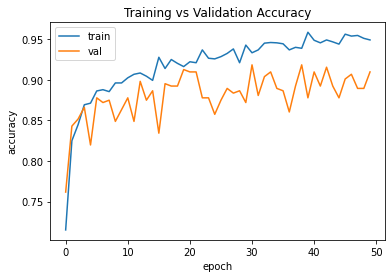

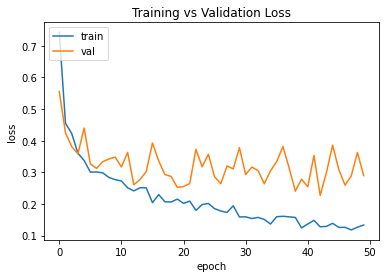

INFO:tensorflow:Assets written to: /myModel/assets
updating: myModel/ (stored 0%)
updating: myModel/assets/ (stored 0%)
updating: myModel/variables/ (stored 0%)
updating: myModel/variables/variables.index (deflated 78%)
updating: myModel/variables/variables.data-00000-of-00001 (deflated 7%)
updating: myModel/keras_metadata.pb (deflated 96%)
updating: myModel/saved_model.pb (deflated 92%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:

# jess: add graphs for accuracy and loss fo training and validation showing with and without augmentation to show improvements

#  use data augmentation layers to widen dataset
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(fill_mode = 'nearest', height_factor=(-0.1, -0.2)),
    tf.keras.layers.RandomContrast(factor=0.2)
])


# # https://www.tensorflow.org/api_docs/python/tf/keras/applications/densenet/preprocess_input
# i = tf.keras.layers.Input([250, 250, 3], dtype = tf.uint8)
# x = tf.cast(i, tf.float32)
# x = tf.keras.applications.densenet.preprocess_input(x)
#  grab pretrained DenseNet model
# core = tf.keras.applications.DenseNet201(
#     weights=None, input_shape=(250, 250, 3), classes=4)
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# #  put layers all together into one model
# finalModel = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
#     data_augmentation,
#     model
# ])


# use pretrained DenseNet - (pretrained on iamgenet dataset)
DenseNet = tf.keras.applications.DenseNet201(input_shape=(250,250,3),include_top=False,weights='imagenet',pooling='avg')
DenseNet.trainable = False

# apply aumentation to model
# edit last layers for our number of classes: 4
finalModel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
    data_augmentation,
    DenseNet,
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(4, activation='softmax')
])


finalModel.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

with tf.device('/device:GPU:0'):

  history=finalModel.fit(X_train,validation_data=X_valid,epochs=50)


# use gpu with google colab
# with tf.device('/device:GPU:0'):
#    finalModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#    history = finalModel.fit(X_train, epochs=30, validation_data=X_valid)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

finalModel.save('/myModel')

#  only for google colab comment out if not using google colab

!zip -r /myModel.zip /myModel

files.download("/myModel.zip")



Epoch 1/50
79/79 [==============================] - 29s 241ms/step - loss: 0.9991 - accuracy: 0.6215 - val_loss: 0.8098 - val_accuracy: 0.6919
Epoch 2/50
79/79 [==============================] - 17s 208ms/step - loss: 0.5702 - accuracy: 0.7819 - val_loss: 0.5607 - val_accuracy: 0.7907
Epoch 3/50
79/79 [==============================] - 17s 207ms/step - loss: 0.5056 - accuracy: 0.8005 - val_loss: 0.5590 - val_accuracy: 0.7849
Epoch 4/50
79/79 [==============================] - 17s 204ms/step - loss: 0.4045 - accuracy: 0.8460 - val_loss: 0.4852 - val_accuracy: 0.8140
Epoch 5/50
79/79 [==============================] - 17s 204ms/step - loss: 0.3557 - accuracy: 0.8761 - val_loss: 0.4850 - val_accuracy: 0.8372
Epoch 6/50
79/79 [==============================] - 17s 205ms/step - loss: 0.4074 - accuracy: 0.8468 - val_loss: 0.6047 - val_accuracy: 0.7791
Epoch 7/50
79/79 [==============================] - 17s 206ms/step - loss: 0.3680 - accuracy: 0.8571 - val_loss: 0.4370 - val_accuracy: 0.8430

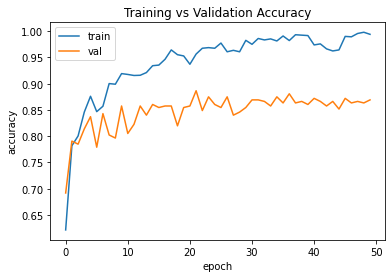

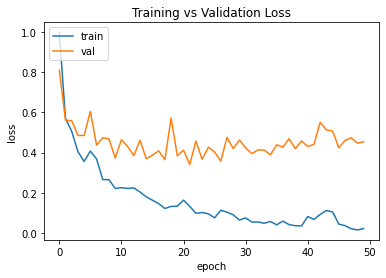

In [68]:
# example without data augmentation to compare - I will probably talk about the usefulness of data augmentation with 
# a smaller dataset to achieve good results

DenseNet2 = tf.keras.applications.DenseNet201(input_shape=(250,250,3),include_top=False,weights='imagenet',pooling='avg')
DenseNet2.trainable = False


finalModel2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
    DenseNet2,
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(4, activation='softmax')
])



finalModel2.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

with tf.device('/device:GPU:0'):

  history2=finalModel2.fit(X_train,validation_data=X_valid,epochs=50)


# use gpu with google colab
# with tf.device('/device:GPU:0'):
#    finalModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#    history = finalModel.fit(X_train, epochs=30, validation_data=X_valid)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loadedModel = keras.models.load_model('/myModel')
# evaluate model